In [329]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import binarize
import scipy.stats as ss

In [330]:
df = pd.read_csv("NYC_Real_Estate.csv")
df.head()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,392,6,10009,5,5,6440,1900,Low,C2,6625000
1,1,402,21,10009,10,10,6794,1913,Low,C4,3936272
2,1,404,55,10009,6,6,4615,1900,Low,C2,8000000
3,1,406,32,10009,8,8,4226,1920,Low,C4,3192840
4,1,387,153,10009,24,24,18523,1920,Low,D9,16232000


In [331]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BOROUGH,48248.0,NaN,NaN,NaN,3.251554,0.903331,1.0,3.0,3.0,4.0,5.0
BLOCK,48248.0,NaN,NaN,NaN,4984.154535,3427.528068,1.0,2204.0,4660.0,6996.0,16319.0
LOT,48248.0,NaN,NaN,NaN,234.400742,496.413133,1.0,21.0,45.0,94.0,9009.0
ZIP CODE,48248.0,NaN,NaN,NaN,10939.604087,1072.741157,0.0,10469.0,11217.0,11237.0,11694.0
RESIDENTIAL UNITS,48248.0,NaN,NaN,NaN,2.569682,17.468624,0.0,1.0,1.0,2.0,1844.0
TOTAL UNITS,48248.0,NaN,NaN,NaN,2.837755,20.752771,0.0,1.0,1.0,2.0,2261.0
GROSS SQUARE FEET,48248.0,NaN,NaN,NaN,3672.552251,29475.398712,0.0,828.0,1620.0,2520.0,3750565.0
YEAR BUILT,48248.0,NaN,NaN,NaN,1827.738082,464.418481,0.0,1920.0,1931.0,1961.0,2017.0
TAX CLASS AT TIME OF SALE,48248,2,Low,44665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUILDING CLASS AT TIME OF SALE,48248,160,A1,5247,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48248 entries, 0 to 48247
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         48248 non-null  int64 
 1   BLOCK                           48248 non-null  int64 
 2   LOT                             48248 non-null  int64 
 3   ZIP CODE                        48248 non-null  int64 
 4   RESIDENTIAL UNITS               48248 non-null  int64 
 5   TOTAL UNITS                     48248 non-null  int64 
 6   GROSS SQUARE FEET               48248 non-null  int64 
 7   YEAR BUILT                      48248 non-null  int64 
 8   TAX CLASS AT TIME OF SALE       48248 non-null  object
 9   BUILDING CLASS AT TIME OF SALE  48248 non-null  object
 10  SALE PRICE                      48248 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 4.0+ MB


No missing, mostly numeric. 



In [333]:
df["BOROUGH"] = df["BOROUGH"].astype("category")
df["TAX CLASS AT TIME OF SALE"] = df["TAX CLASS AT TIME OF SALE"].astype("category")
df["BUILDING CLASS AT TIME OF SALE"] = df["BUILDING CLASS AT TIME OF SALE"].astype("category")
#df["ZIP CODE"] = df["ZIP CODE"].astype("category")


In [334]:
sns.pairplot(df)

There appear to be some really large outliers that make this harder to process. We can remove them and try again. 

In [335]:
df = df[df["SALE PRICE"] < 1000000]
df = df[df["TOTAL UNITS"] < 2000]
df = df[df["YEAR BUILT"] >1000]
df = df[df["SALE PRICE"] > 100000]
df = df[df["GROSS SQUARE FEET"] < 200000]
df.drop(columns={"ZIP CODE", "BLOCK", "LOT"}, inplace=True)


Note - the year could likely be handled differently. I suspect that we'd want to impute (fill in a missing value, such as the median) where the year is not tracked. We haven't done that yet, so I'm going to filter them out. 

The zipcode is something that may have value. It is a categorical value, not a numerical one. We'd probably need a better understanding of how it relates to the other metics. Similar to Block and Lot - these are numbers, but they are categorical. To properly process stuff like that we would need some more understanding about the problem. All 3 would probably be better represented by something like neighborhood. 

<AxesSubplot:xlabel='BUILDING CLASS AT TIME OF SALE', ylabel='SALE PRICE'>

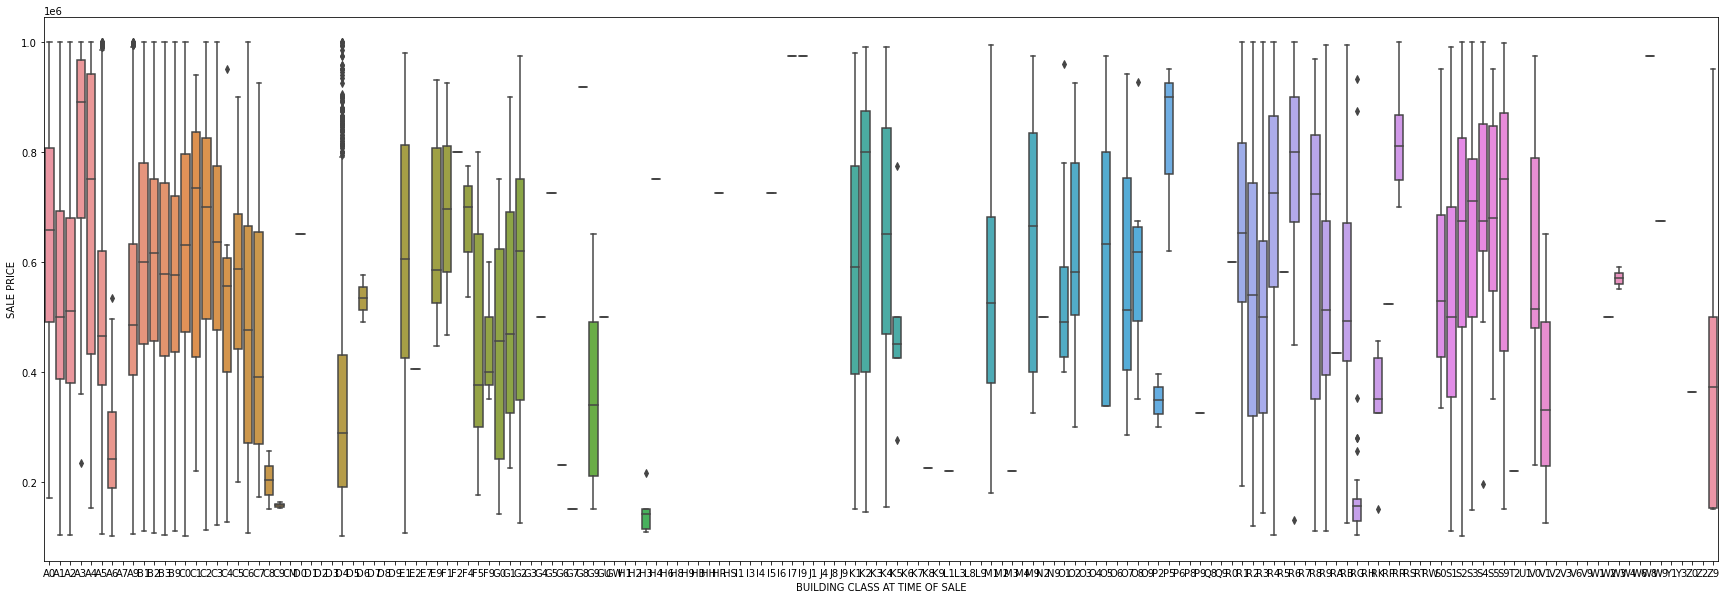

In [336]:
plt.figure(figsize=(30, 10))
sns.boxplot(data=df, x="BUILDING CLASS AT TIME OF SALE", y="SALE PRICE")

/Users/akeems/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BUILDING CLASS AT TIME OF SALE', ylabel='count'>

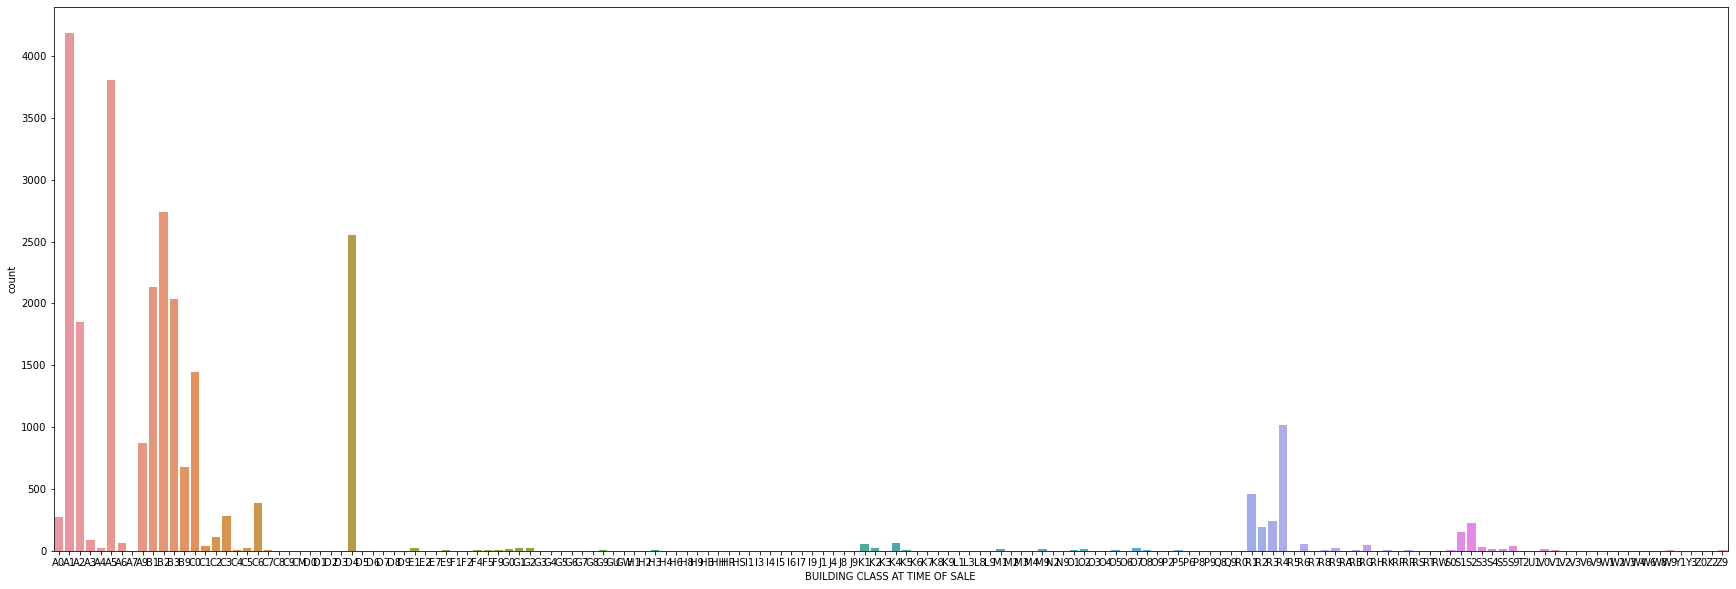

In [337]:
plt.figure(figsize=(30, 10))
sns.countplot(df["BUILDING CLASS AT TIME OF SALE"])

In [338]:
df["BUILDING CLASS AT TIME OF SALE"].value_counts().sort_values(ascending=True)

M2       0
L9       0
CM       0
R7       0
I4       0
      ... 
B1    2134
D4    2557
B2    2737
A5    3810
A1    4186
Name: BUILDING CLASS AT TIME OF SALE, Length: 160, dtype: int64

This is kind of a mess. Most classes seem to be infequent. A few have lots. The correlation with value differs for onlt a few classes. 

The correct answer in this case is probably to use some domain knowlege and segregate these classes into larger groups. They are probably a bazillion different classifications for apartment buildings, condos, etc... We could leave them in, we could drop them, we could transform them. There isn't a perfectly clear answer here. I am going to drop it because there are many categories that have only 1 or very few entries. 

total units and residential units are also almost perfect copies of each other. 

In [339]:
df.drop(columns={"BUILDING CLASS AT TIME OF SALE", "TOTAL UNITS"}, inplace=True)

<AxesSubplot:xlabel='TAX CLASS AT TIME OF SALE', ylabel='SALE PRICE'>

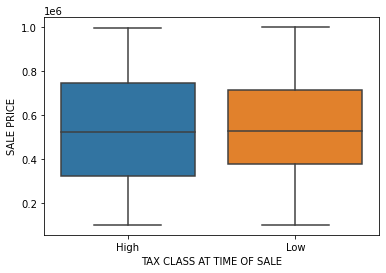

In [340]:
sns.boxplot(data=df, x="TAX CLASS AT TIME OF SALE", y="SALE PRICE")

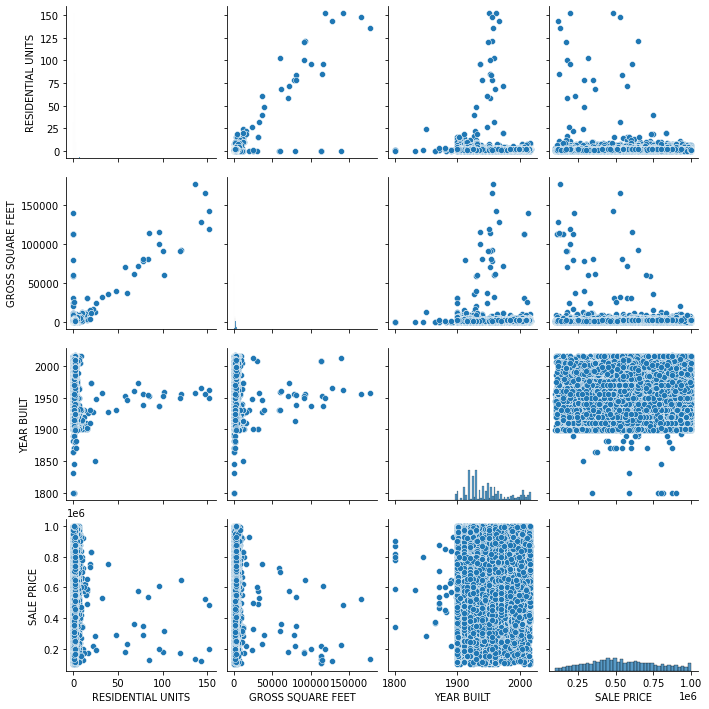

In [341]:
sns.pairplot(df)

<AxesSubplot:>

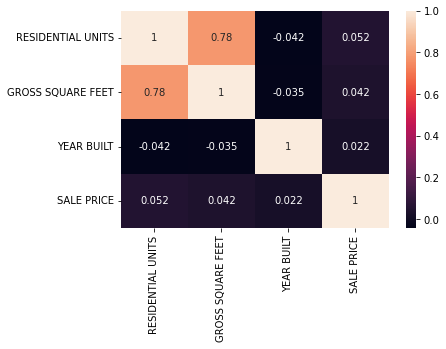

In [342]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='GROSS SQUARE FEET', ylabel='Density'>

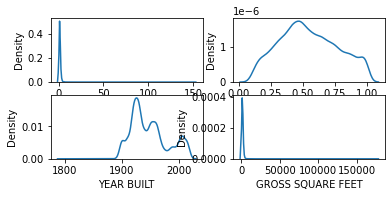

In [343]:
thinkplot.PrePlot(4,3,2)
sns.kdeplot(data=df, x="RESIDENTIAL UNITS")
thinkplot.SubPlot(2)
sns.kdeplot(data=df, x="SALE PRICE")
thinkplot.SubPlot(3)
sns.kdeplot(data=df, x="YEAR BUILT")
thinkplot.SubPlot(4)
sns.kdeplot(data=df, x="GROSS SQUARE FEET")


/Users/akeems/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='GROSS SQUARE FEET', ylabel='Density'>

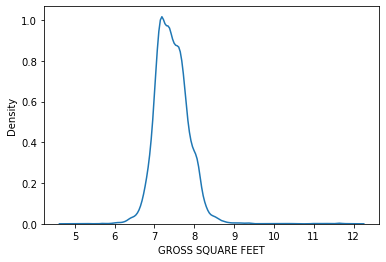

In [344]:
sns.kdeplot(np.log(df["GROSS SQUARE FEET"]))

We have some skewed data. Why not try Box-Cox?

/var/folders/px/vhm_920n7zx2wvqq_ht0q5tm0000gp/T/ipykernel_12552/2092699694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["GROSS SQUARE FEET"], lamYear = ss.boxcox(df["GROSS SQUARE FEET"])


-0.35231032526525047


<AxesSubplot:xlabel='GROSS SQUARE FEET', ylabel='Count'>

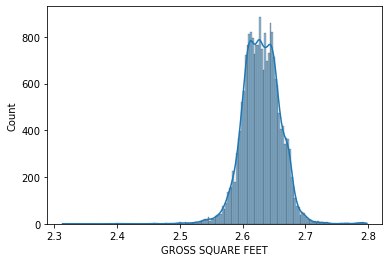

In [345]:
df = df[df["GROSS SQUARE FEET"] > 0]
df["GROSS SQUARE FEET"], lamYear = ss.boxcox(df["GROSS SQUARE FEET"])
print(lamYear)
sns.histplot(df["GROSS SQUARE FEET"], kde=True)

Residential units is also a bit odd. It looks like the vast majority are single family homes, a bunch are duplex/triplex, then a few are larger. I'm going to try representing these similar to that

In [346]:
df["RESIDENTIAL UNITS"].value_counts().head()

1    11363
2     7859
3     1481
4      307
0      306
Name: RESIDENTIAL UNITS, dtype: int64

In [347]:
binInterval = [0, 1, 4, 10000000]
binLabels   = ["Single", "2-4plex", "MF"]
df['RESIDENTIAL UNITS'] = pd.cut(df['RESIDENTIAL UNITS'], bins = binInterval, labels=binLabels)

/var/folders/px/vhm_920n7zx2wvqq_ht0q5tm0000gp/T/ipykernel_12552/2493313324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RESIDENTIAL UNITS'] = pd.cut(df['RESIDENTIAL UNITS'], bins = binInterval, labels=binLabels)


In [348]:
df.head()

,BOROUGH,RESIDENTIAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
24,1,MF,2.708449,1901,Low,416790
25,1,MF,2.708449,1901,Low,630370
33,1,MF,2.735271,1850,Low,282000
108,1,NaN,2.785111,1913,High,220000
127,1,MF,2.763881,1900,Low,489854


OK. Predict. 

In [349]:
df_ = pd.get_dummies(df, drop_first=True)

df_.head()

,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,BOROUGH_2,BOROUGH_3,BOROUGH_4,BOROUGH_5,RESIDENTIAL UNITS_2-4plex,RESIDENTIAL UNITS_MF,TAX CLASS AT TIME OF SALE_Low
24,2.708449,1901,416790,0,0,0,0,0,1,1
25,2.708449,1901,630370,0,0,0,0,0,1,1
33,2.735271,1850,282000,0,0,0,0,0,1,1
108,2.785111,1913,220000,0,0,0,0,0,0,0
127,2.763881,1900,489854,0,0,0,0,0,1,1


In [350]:
#Model
y = np.array(df_["SALE PRICE"]).reshape(-1,1)
x = np.array(df_.drop(columns={"SALE PRICE"}))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

model = LinearRegression().fit(X_train_norm, y_train)

preds = model.predict(X_test_norm)

print(mean_squared_error(preds, y_test, squared=False))
print(model.score(X_test_norm, y_test))


196912.58876722888
0.15650813343706882


Not amazing. 

I think I got the RMSE down lower than most of you, but the r2 sucks. I also notice that my R2 jumps pretty randomly from trial to trial. What does this mean? I have some suspicions, they likely apply to yours as well:
<ul>
<li>The prediction we are making is hard. I suspect that houses worth $400k and apartment buildings with 150 units are fundamentally different. We may want to predict them separately. 
<li>The linear regression might not be the best model.
</ul> 